In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import tensorflow_datasets as tfds

In [3]:
imdb , info = tfds.load("imdb_reviews",as_supervised=True,with_info=True)

In [4]:
train_data , test_data = imdb["train"], imdb["test"]

training_sentences = []
training_labels =[]

testing_sentences = []
testing_labels = []

for key, value in train_data:
    training_sentences.append(key.numpy().decode("utf8"))
    training_labels.append(value.numpy())

for key, value in test_data:
    testing_sentences.append(key.numpy().decode("utf8"))
    testing_labels.append(value.numpy())
    
final_training_labels = np.array(training_labels)
final_testing_labels = np.array(testing_labels)

In [5]:
vocab_size = 10000
embedding_dim = 16
max_word = 120
oov = "<OOV>"
num_epoch = 10
trunc = "post"

token = Tokenizer(num_words = vocab_size,oov_token=oov)
token.fit_on_texts(training_sentences)
word_index = token.word_index

sequence = token.texts_to_sequences(training_sentences)
padded = pad_sequences(sequence,truncating=trunc,maxlen=max_word)

testing_seq = token.texts_to_sequences(testing_sentences)
test_pad = pad_sequences(testing_seq,maxlen=max_word)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_word),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 170,657
Trainable params: 170,657
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(padded,final_training_labels,epochs=num_epoch,validation_data=(test_pad , final_testing_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 110s 4ms/sample - loss: 0.5135 - acc: 0.7244 - val_loss: 0.3497 - val_acc: 0.8475
Epoch 2/10
25000/25000 [==============================] - 101s 4ms/sample - loss: 0.3014 - acc: 0.8781 - val_loss: 0.3475 - val_acc: 0.8489
Epoch 3/10
25000/25000 [==============================] - 103s 4ms/sample - loss: 0.2344 - acc: 0.9085 - val_loss: 0.3679 - val_acc: 0.8387
Epoch 4/10
25000/25000 [==============================] - 102s 4ms/sample - loss: 0.1809 - acc: 0.9344 - val_loss: 0.4358 - val_acc: 0.8340
Epoch 5/10
25000/25000 [==============================] - 103s 4ms/sample - loss: 0.1393 - acc: 0.9501 - val_loss: 0.5385 - val_acc: 0.8234
Epoch 6/10
25000/25000 [==============================] - 102s 4ms/sample - loss: 0.1037 - acc: 0.9634 - val_loss: 0.5555 - val_acc: 0.8146
Epoch 7/10
25000/25000 [==============================] - 103s 4ms/sample - loss: 0.0644 - acc: 0.9787 - val_l

In [8]:
sentence = "I really think this is amazing. honest."
sequence = token.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


In [9]:
e = model.layers[0]

In [10]:
weights = e.get_weights()[0]

In [11]:
weights.shape

(10000, 16)

In [12]:
import matplotlib.pyplot as plt

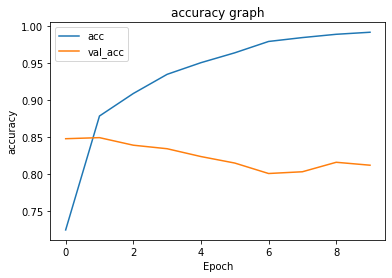

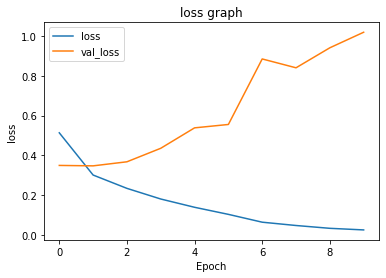

In [13]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("accuracy graph")
plt.legend(["acc","val_acc"])
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("loss graph")
plt.legend(["loss","val_loss"])
plt.show()